# Application On all sources

## Imports

In [257]:
%load_ext autoreload
%autoreload 2
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns
import joblib


In [2]:
from utilities import make_model
from choices import param_dict 
from utilities import deets

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


## Load

### Load Model

In [3]:
import joblib 
model = joblib.load('models/lightGBM-final.pkl')
clf = model.clf
clf 

LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               force_col_wise=True, is_unbalance=True, metric=['auc_mu'],
               num_class=8, objective='multiclass', random_state=42,
               sparse=True, verbosity=0)

### Load Data

In [4]:
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' , 
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )

# feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
#     '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' , 
# ]+['var_inter_hard_prob_hs', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm', 'ks_intra_prob_b'] )

x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
xi = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
xi_col = xi.columns.to_list()
df = pd.merge(xi,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]

x = df[x_col]
xi = df[xi_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]

u_var = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u_var = u_var.drop(columns=feat_to_drop)
ui_var = pd.read_csv('compiled_data_v3/id_frame-unid-var-src.csv' , index_col='name')
u_var.columns = u_var.columns.str.replace(' ' ,'_' , regex=False)

u_var = u_var.reset_index()
ui_var = ui_var.reset_index()
u_var = u_var[~u_var['name'].isin(x.index.to_list())].set_index('name')
ui = ui_var[~ui_var['name'].isin(xi.index.to_list())].set_index('name')

deets(x)
deets(u_var)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 37873
Number of Columns : 41
_____________________________________________________


In [5]:
u_nv = []
ui_nv = []
for i in range(8):
    u_nv.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/x-chunk-{i}.csv' , index_col='name'))
    ui_nv.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/id-chunk-{i}.csv' , index_col='name'))
#u.append(u_var)
#ui.append(ui_var)
u_nv = pd.concat(u_nv)
ui_nv = pd.concat(ui_nv)
feat_to_drop_2 = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' ,  '0p3_8_csc'
]+['var_inter_hard_prob_hs', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm', ] )

u_nv = u_nv.drop(columns=feat_to_drop_2)
u_nv = u_nv.reset_index()
ui_nv = ui_nv.reset_index()
# remove sources which were in training set
u_nv = u_nv[~u_nv['name'].isin(x.index.to_list())].set_index('name')
ui_nv = ui_nv[~ui_nv['name'].isin(xi.index.to_list())].set_index('name')
u_nv


,gal_b2,gal_l2,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,ks_intra_prob_b,h-csc,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,2.561951,8.447115,NaN,NaN,2.809762,NaN,8.723285,0.0,7.269610,4.972998e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J003936.7-731249,2.548397,8.447672,NaN,NaN,5.267622,NaN,3.246585,0.0,7.049432,NaN,...,8.751645,2.628340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004028.7-731106,2.546591,8.445331,NaN,NaN,2.001693,NaN,2.474462,0.0,7.081906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004506.3-730056,2.536271,8.432664,NaN,NaN,1.712439,NaN,8.102221,0.0,8.360297,1.135905e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004659.0-731918,2.553126,8.427077,NaN,NaN,2.771679,NaN,3.443930,0.0,7.092505,7.595018e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220556.3-500415,2.145628,9.595540,NaN,NaN,4.616799,NaN,0.528451,0.0,2.018091,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220557.3-500827,2.146864,9.592593,NaN,NaN,7.608600,NaN,7.668830,10.0,9.531665,2.474932e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220600.9-501131,2.147357,9.590334,6.145112,0.001324,4.804390,5.00,8.861115,0.0,6.920444,2.396984e-10,...,8.616583,3.240831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
deets(u_nv)
deets(u_var)

_____________________________________________________
------------------------------
Number of Objects : 231493
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 37873
Number of Columns : 41
_____________________________________________________


## Make Predictions

In [7]:
from utilities import softmax , norm_prob
def get_pred_table(u):
    pred_prob = (clf.predict_proba(u))
    pred_prob_df = pd.DataFrame(pred_prob , columns=[f'prob_{el}' for el in clf.classes_] , index = u.index.to_list())
    pred_prob_df
    u_df = pd.DataFrame({
        'name' : u.index.to_list() , 
        'class' : clf.predict(u) , 
        'prob' : [np.amax(el) for el in pred_prob] ,
        'prob_margin' : [el[-1]-el[-2] for el in np.sort(pred_prob , axis=1 ,)]
    }).set_index('name')
    u_df = pd.merge(u_df , pred_prob_df , left_index=True , right_index=True)
    u_df.index.name = 'name'
    u_df 
    return u_df

In [8]:
u_df_var = get_pred_table(u_var)
u_df_nv = get_pred_table(u_nv)

In [9]:
ui_nv.var_flag.value_counts()

0    231493
Name: var_flag, dtype: int64

## Result Analysis

In [10]:
def get_prob_th_table(u_df):
    #u_df = get_pred_table(u)
    u_df_num = u_df['class'].value_counts().to_frame()
    th_list = [0.5 , 0.8 , 0.997]
    u_df_num = pd.concat([
                    u_df['class'].value_counts() ,
                    #u_df[u_df['prob']>mode]['class'].value_counts(),
                    u_df[u_df['prob']>0.5]['class'].value_counts(),
                    #u_df[u_df['prob']>0.6]['class'].value_counts(),
                    #u_df[u_df['prob']>0.7]['class'].value_counts(),
                    #u_df[u_df['prob']>0.9]['class'].value_counts(),
                    #u_df[u_df['prob']>0.9]['class'].value_counts(),
                    u_df[u_df['prob']>0.997]['class'].value_counts(),
                    u_df[u_df['prob']>0.9999]['class'].value_counts(),
                    u_df[u_df['prob']>0.99999]['class'].value_counts(),
                    u_df[u_df['prob']>0.9999994]['class'].value_counts(),
                    ] , axis=1)
    u_df_num.columns = ['Argmax'  , '0.9'  ,  f"0.997" , '4-sigma' , '99.999' , '5-sigma']
    u_df_num.index.name = 'class'
    #u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
    u_df_num.append(u_df_num.sum() , ignore_index=True)
    #print(u_df_num.to_markdown())
    return u_df_num
    #u_df_num.to_csv('temp_files/non-var-src-count.csv')

In [11]:
u_df_nv = get_pred_table(u_nv)
u_df_var = get_pred_table(u_var)


In [12]:
nv_count = get_prob_th_table(u_df_nv)
var_count = get_prob_th_table(u_df_var)
display(nv_count)
display(var_count)

,Argmax,0.9,0.997,4-sigma,99.999,5-sigma
class,,,,,,
AGN,103705,96669,29063,7543.0,40.0,NaN
STAR,54456,46663,12652,4013.0,519.0,NaN
YSO,31715,30740,3311,55.0,2.0,NaN
PULSAR,20112,15397,52,NaN,NaN,NaN
CV,8726,5611,45,NaN,NaN,NaN
HMXB,6530,4789,129,NaN,NaN,NaN
ULX,4703,3327,16,NaN,NaN,NaN
LMXB,1546,984,129,28.0,NaN,NaN


,Argmax,0.9,0.997,4-sigma,99.999,5-sigma
class,,,,,,
AGN,10937,10348,3537,1031.0,43.0,NaN
STAR,9511,9100,3496,1153.0,128.0,NaN
YSO,8809,8678,1873,153.0,11.0,NaN
HMXB,3030,2655,310,46.0,3.0,NaN
ULX,2273,1959,34,NaN,NaN,NaN
CV,1791,1456,44,1.0,NaN,NaN
PULSAR,1380,1079,11,NaN,NaN,NaN
LMXB,142,136,68,43.0,27.0,NaN


In [13]:
var_count.to_csv('temp_files/var-src-count.csv')

In [14]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
#cl.remove('LMXB')
sample = [u_df_nv[u_df_nv['class']==c]['prob'] for c in cl]
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title="Unidentified sources | No Imputation | LightGBM classifier",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image('temp_res_comp/unid_prob_dist/lightGBM_none.jpg')
fig.show()

In [15]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
#cl.remove('LMXB')
sample = [u_df_var[u_df_var['class']==c]['prob'] for c in cl]
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title="Unidentified sources | No Imputation | LightGBM classifier",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image('temp_res_comp/unid_prob_dist/lightGBM_none.jpg')
fig.show()

In [16]:
u_df_nv.describe()

,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
count,231493.000000,231493.000000,2.314930e+05,2.314930e+05,2.314930e+05,2.314930e+05,2.314930e+05,231493.000000,2.314930e+05,2.314930e+05
mean,0.807181,0.686742,4.173196e-01,5.220832e-02,3.349533e-02,1.058762e-02,8.766390e-02,0.237628,3.044437e-02,1.306526e-01
std,0.206934,0.329117,4.264340e-01,1.295215e-01,1.234656e-01,6.212608e-02,2.015018e-01,0.331153,1.011388e-01,3.067131e-01
min,0.205710,0.000004,6.164153e-08,6.316323e-08,5.323325e-08,2.548662e-08,1.204243e-07,0.000002,1.543063e-08,2.030468e-08
25%,0.641205,0.405346,1.177734e-03,1.006927e-04,5.206385e-05,1.341063e-05,7.566319e-05,0.005771,3.040296e-05,4.013823e-05
50%,0.895088,0.824068,2.218320e-01,3.858610e-03,7.090922e-04,1.267348e-04,2.133271e-03,0.054154,6.973274e-04,3.528545e-04
75%,0.992696,0.987381,9.365391e-01,3.522768e-02,6.819808e-03,1.042520e-03,4.457838e-02,0.361564,9.995821e-03,2.716948e-03
max,0.999999,0.999998,9.999944e-01,9.993147e-01,9.998804e-01,9.999787e-01,9.996796e-01,0.999999,9.981638e-01,9.999917e-01


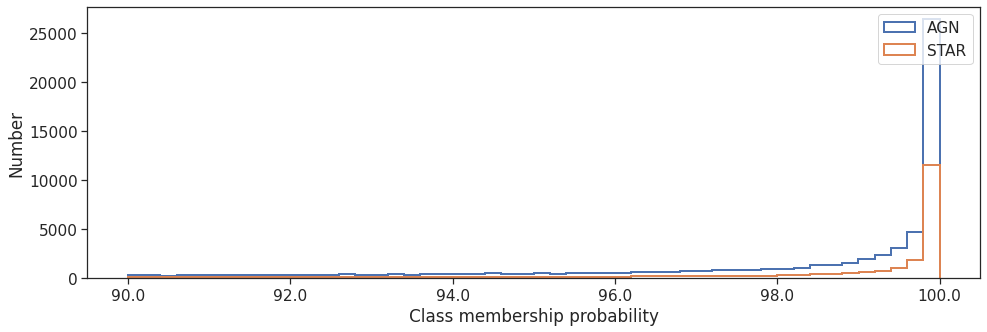

In [17]:
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(16,5))
from utilities import set_plot
set_plot(font_size=1.4)
ax = fig.add_subplot(111)
cl = 'AGN'
to_plot = u_df_nv[u_df_nv['class']==cl]*100
to_plot = to_plot[to_plot[f'prob_{cl}']>90]
plt.hist(to_plot[f'prob_{cl}'] , histtype = 'step' , bins=50 , label='AGN' , linewidth=2)
cl = 'STAR'
to_plot = u_df_nv[u_df_nv['class']==cl]*100
to_plot = to_plot[to_plot[f'prob_{cl}']>90]
plt.hist(to_plot[f'prob_{cl}'] , histtype = 'step' , bins=50 , label='STAR' , linewidth=2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Number')
plt.xlabel('Class membership probability')
plt.legend()
plt.show()

In [18]:
u_df_nv['prob_AGN'].max()
u_df_nv['prob_STAR'].max()

0.9999988645741362

In [27]:
u_nv[['gal_b2' , 'gal_l2']]

,gal_b2,gal_l2
name,,
2CXO J003935.9-732725,2.561951,8.447115
2CXO J003936.7-731249,2.548397,8.447672
2CXO J004028.7-731106,2.546591,8.445331
2CXO J004506.3-730056,2.536271,8.432664
2CXO J004659.0-731918,2.553126,8.427077
...,...,...
2CXO J220556.3-500415,2.145628,9.595540
2CXO J220557.3-500827,2.146864,9.592593
2CXO J220600.9-501131,2.147357,9.590334


In [28]:
ui_nv

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag
name,,,,,,,,,,
2CXO J003935.9-732725,3.294118,0,0,0,9.899767,-73.457136,0.576271,0,0,0
2CXO J003936.7-731249,4.157895,0,0,0,9.903193,-73.213742,0.525424,0,0,0
2CXO J004028.7-731106,14.422175,0,0,0,10.119748,-73.185171,0.508475,0,0,0
2CXO J004506.3-730056,10.447263,0,0,0,11.276413,-73.015666,0.593220,0,0,0
2CXO J004659.0-731918,2.444444,0,0,0,11.745895,-73.321890,0.593220,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2CXO J220556.3-500415,2.631579,0,0,0,331.484996,-50.070913,0.542373,0,0,0
2CXO J220557.3-500827,2.578947,0,0,0,331.489033,-50.141066,0.508475,0,0,0
2CXO J220600.9-501131,10.093500,0,0,0,331.504140,-50.192019,0.389831,0,0,0


In [23]:
u_df_nv

,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J003935.9-732725,STAR,0.777433,0.638933,0.055179,0.138500,0.010542,0.000267,0.012819,0.777433,0.004473,0.000788
2CXO J003936.7-731249,PULSAR,0.608646,0.451597,0.135585,0.084166,0.007442,0.002624,0.608646,0.157049,0.002616,0.001873
2CXO J004028.7-731106,AGN,0.446212,0.092019,0.446212,0.088609,0.037777,0.003872,0.048872,0.354193,0.017957,0.002509
2CXO J004506.3-730056,PULSAR,0.598368,0.283901,0.021978,0.314468,0.003833,0.000158,0.598368,0.058450,0.002176,0.000569
2CXO J004659.0-731918,STAR,0.821817,0.718309,0.032379,0.005989,0.103508,0.000253,0.031668,0.821817,0.003821,0.000564
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220556.3-500415,PULSAR,0.358935,0.067606,0.056423,0.236875,0.291329,0.003576,0.358935,0.032132,0.019594,0.001135
2CXO J220557.3-500827,HMXB,0.453362,0.129494,0.026158,0.323868,0.453362,0.006044,0.087652,0.077696,0.024157,0.001062
2CXO J220600.9-501131,CV,0.534976,0.327893,0.129298,0.534976,0.103171,0.000248,0.207083,0.022444,0.002282,0.000499


### Final classified tables can be found in app_data/final_table

In [32]:
temp = pd.merge(ui_nv , u_df_nv, left_index=True , right_index=True)
nv_all = pd.merge(temp , u_nv , left_index=True , right_index=True)
nv_all

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,3.294118,0,0,0,9.899767,-73.457136,0.576271,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J003936.7-731249,4.157895,0,0,0,9.903193,-73.213742,0.525424,0,0,0,...,8.751645,2.628340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004028.7-731106,14.422175,0,0,0,10.119748,-73.185171,0.508475,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004506.3-730056,10.447263,0,0,0,11.276413,-73.015666,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004659.0-731918,2.444444,0,0,0,11.745895,-73.321890,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220556.3-500415,2.631579,0,0,0,331.484996,-50.070913,0.542373,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220557.3-500827,2.578947,0,0,0,331.489033,-50.141066,0.508475,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220600.9-501131,10.093500,0,0,0,331.504140,-50.192019,0.389831,0,0,0,...,8.616583,3.240831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
temp = pd.merge(ui_var.set_index('name') , u_df_var, left_index=True , right_index=True , how='right')
v_all = pd.merge(temp , u_var , left_index=True , right_index=True)
v_all

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J004829.5-732959,5.085714,1,0,0,12.123114,-73.499901,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J005449.0-725128,3.600000,1,0,0,13.704345,-72.857987,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J010049.1-731526,2.111111,1,0,0,15.204787,-73.257463,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J010049.8-731045,2.777778,1,0,0,15.207831,-73.179381,0.593220,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J010647.7-730940,2.540541,1,0,0,16.699164,-73.161175,0.525424,0,0,0,...,7.329417,3.418280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,2.651163,1,0,0,331.138121,-49.987838,0.491525,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220508.3-495935,4.965517,1,0,0,331.284642,-49.993301,0.474576,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220544.0-495505,2.857143,1,0,0,331.433541,-49.918280,0.542373,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pd.concat([nv_all , v_all]).to_csv('../not_on_git/all_classified.csv')

In [43]:
x

,gal_b2,gal_l2,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,h-csc,b-csc,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,2.487849,8.497420,2.632625,0.000904,5.046627,0.00,8.195828,1.0,1.499984e-09,0.000345,...,4.784757,2.894845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,4.327881,9.393618,9.999996,0.017956,1.995495,10.00,8.236122,0.0,1.102579e-07,0.054905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,2.488746,8.496825,9.999844,0.001090,6.298061,7.50,8.909807,1.0,8.495617e-10,0.001753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,2.489281,8.496673,8.302307,0.026969,8.383567,6.25,9.841010,2.0,9.022461e-10,0.004952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,2.487878,8.497314,5.005657,0.000442,7.272317,3.75,9.850364,2.0,1.416053e-09,0.000386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,0.888957,8.713766,NaN,NaN,3.074255,NaN,0.408315,0.0,NaN,0.010893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,5.054270,2.262789,NaN,NaN,3.363494,NaN,8.996703,0.0,NaN,0.006719,...,7.935403,4.953001,7.119828,NaN,6.445148,NaN,6.807378,5.048179,NaN,NaN
2CXO J131747.5+411745,9.176328,2.880393,NaN,NaN,1.768983,NaN,2.472603,0.0,9.654383e-08,0.044660,...,8.002279,2.122574,NaN,5.055027,NaN,4.955872,NaN,NaN,NaN,6.731328


In [49]:
print(nv_all.columns.to_list())

['significance', 'var_flag', 'streak_src_flag', 'pileup_flag', 'ra', 'dec', 'missing', 'sat_src_flag', 'extent_flag', 'conf_flag', 'class', 'prob', 'prob_margin', 'prob_AGN', 'prob_CV', 'prob_HMXB', 'prob_LMXB', 'prob_PULSAR', 'prob_STAR', 'prob_ULX', 'prob_YSO', 'gal_b2', 'gal_l2', 'var_inter_prob_b', 'var_inter_sigma_b', 'var_intra_prob_b', 'var_inter_index_b', 'kp_intra_prob_b', 'var_intra_index_b', 'ks_intra_prob_b', 'h-csc', 'b-csc', 'm-csc', 's-csc', 'u-csc', 'FUV', 'NUV', 'u-sdss', 'g-sdss', 'r-sdss', 'i-sdss', 'z-sdss', 'W1', 'W2', 'W3', 'W4', '24 microns (MIPS)', 'J', 'H', 'K', 'G', 'Bp', 'Rp', 'B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']


In [46]:
pd.merge(xi , x , left_index=True , right_index=True).to_csv('../not_on_git/train_data.csv')

In [55]:
v_all.to_csv('../not_on_git/final_classification/var-clf.csv')

In [56]:
nv_all.to_csv('../not_on_git/final_classification/non-var-clf.csv')

# Classification goodness analysis

## Data Analysis

In [88]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 

### Some functions

In [94]:
def get_prob_th_table(u_df):
    #u_df = get_pred_table(u)
    u_df_num = u_df['class'].value_counts().to_frame()
    th_list = [0.5 , 0.8 , 0.997]
    u_df_num = pd.concat([
                    u_df['class'].value_counts() ,
                    #u_df[u_df['prob']>mode]['class'].value_counts(),
                    u_df[u_df['prob']>0.5]['class'].value_counts(),
                    #u_df[u_df['prob']>0.6]['class'].value_counts(),
                    #u_df[u_df['prob']>0.7]['class'].value_counts(),
                    #u_df[u_df['prob']>0.9]['class'].value_counts(),
                    #u_df[u_df['prob']>0.9]['class'].value_counts(),
                    u_df[u_df['prob']>0.997]['class'].value_counts(),
                    u_df[u_df['prob']>0.9999]['class'].value_counts(),
                    u_df[u_df['prob']>0.99999]['class'].value_counts(),
                    u_df[u_df['prob']>0.9999994]['class'].value_counts(),
                    ] , axis=1)
    u_df_num.columns = ['Argmax'  , '0.9'  ,  f"0.997" , '4-sigma' , '99.999' , '5-sigma']
    u_df_num.index.name = 'class'
    #u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
    u_df_num.append(u_df_num.sum() , ignore_index=True)
    #print(u_df_num.to_markdown())
    return u_df_num
    #u_df_num.to_csv('temp_files/non-var-src-count.csv')

In [93]:
nv = pd.read_csv('../not_on_git/final_classification/non-var-clf.csv' , index_col='name' , usecols=[ 'name','significance' , 'missing', 'class' , 'prob' , 'prob_margin'])
nv

,significance,missing,class,prob,prob_margin
name,,,,,
2CXO J003935.9-732725,3.294118,0.576271,STAR,0.777433,0.638933
2CXO J003936.7-731249,4.157895,0.525424,PULSAR,0.608646,0.451597
2CXO J004028.7-731106,14.422175,0.508475,AGN,0.446212,0.092019
2CXO J004506.3-730056,10.447263,0.593220,PULSAR,0.598368,0.283901
2CXO J004659.0-731918,2.444444,0.593220,STAR,0.821817,0.718309
...,...,...,...,...,...
2CXO J220556.3-500415,2.631579,0.542373,PULSAR,0.358935,0.067606
2CXO J220557.3-500827,2.578947,0.508475,HMXB,0.453362,0.129494
2CXO J220600.9-501131,10.093500,0.389831,CV,0.534976,0.327893


In [97]:
#['Argmax'  , '0.9'  ,  f"0.997" , '4-sigma' , '99.999' , '5-sigma']
nv_counts = get_prob_th_table(nv)
nv_counts

,Argmax,0.9,0.997,4-sigma,99.999,5-sigma
class,,,,,,
AGN,103705,96669,29063,7543.0,40.0,NaN
STAR,54456,46663,12652,4013.0,519.0,NaN
YSO,31715,30740,3311,55.0,2.0,NaN
PULSAR,20112,15397,52,NaN,NaN,NaN
CV,8726,5611,45,NaN,NaN,NaN
HMXB,6530,4789,129,NaN,NaN,NaN
ULX,4703,3327,16,NaN,NaN,NaN
LMXB,1546,984,129,28.0,NaN,NaN


In [6]:
import pandas as pd 
nv = pd.read_csv('../not_on_git/final_classification/all_classified.csv' , index_col='name' , usecols=[ 'name','ra','dec' , 'significance' , 'missing', 'class' , 'prob' , 'var_flag' , 'var_inter_prob_b',
 'var_intra_prob_b',
 'kp_intra_prob_b',])
nv = nv[nv['var_flag']==1]
nv = nv[nv['class']=='AGN']
nv = nv[nv['prob']>0.9999]
nv

,significance,var_flag,ra,dec,missing,class,prob,var_inter_prob_b,var_intra_prob_b,kp_intra_prob_b
name,,,,,,,,,,
2CXO J095759.7+024657,7.863123,1,149.498892,2.782597,0.322034,AGN,0.999976,NaN,9.057800,9.821623
2CXO J100200.3+025608,5.682429,1,150.501564,2.935694,0.271186,AGN,0.999989,NaN,1.636669,0.124013
2CXO J122348.8+103252,4.555556,1,185.953621,10.547840,0.423729,AGN,0.999928,NaN,6.627251,9.838734
2CXO J122448.9+130425,5.235294,1,186.203779,13.073653,0.423729,AGN,0.999946,NaN,8.446705,9.666439
2CXO J122735.9+082030,2.216216,1,186.899733,8.341783,0.440678,AGN,0.999901,NaN,9.853871,8.921673
...,...,...,...,...,...,...,...,...,...,...
2CXO J100657.8+515823,4.052632,1,151.740869,51.973248,0.288136,AGN,0.999967,6.363418,8.673201,9.134697
2CXO J020328.9-050709,2.818182,1,30.870775,-5.119341,0.474576,AGN,0.999930,2.374999,NaN,NaN
2CXO J020455.8-051054,12.196591,1,31.232601,-5.181689,0.254237,AGN,0.999974,0.457596,5.137860,8.396683


In [10]:
from utilities import get_true_data 
td = get_true_data(nv[['ra','dec' , 'significance' , 'missing', 'class' , 'prob' , ]])
td = td[[
    'ra','dec' , 'significance' , 'missing', 'class' , 'prob' ,
     'var_inter_prob_b',
 'var_inter_sigma_b',
 'var_intra_prob_b',
 'var_inter_index_b',
 'kp_intra_prob_b',
 'var_intra_index_b',
 'ks_intra_prob_b',
]]
td

,ra,dec,significance,missing,class,prob,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,ks_intra_prob_b
name,,,,,,,,,,,,,
2CXO J095759.7+024657,149.498892,2.782597,7.863123,0.322034,AGN,0.999976,NaN,NaN,0.905780,NaN,0.982164,6.0,0.855364
2CXO J100200.3+025608,150.501564,2.935694,5.682429,0.271186,AGN,0.999989,NaN,NaN,0.163667,NaN,0.012474,0.0,0.016552
2CXO J122348.8+103252,185.953621,10.547840,4.555556,0.423729,AGN,0.999928,NaN,NaN,0.662725,NaN,0.983875,4.0,0.965889
2CXO J122448.9+130425,186.203779,13.073653,5.235294,0.423729,AGN,0.999946,NaN,NaN,0.844671,NaN,0.966646,2.0,0.971679
2CXO J122735.9+082030,186.899733,8.341783,2.216216,0.440678,AGN,0.999901,NaN,NaN,0.985387,NaN,0.892175,6.0,0.976200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J100657.8+515823,151.740869,51.973248,4.052632,0.288136,AGN,0.999967,0.636342,3.821131e-06,0.867320,4.0,0.913476,2.0,0.941001
2CXO J020328.9-050709,30.870775,-5.119341,2.818182,0.474576,AGN,0.999930,0.237500,8.841642e-07,NaN,0.0,NaN,NaN,NaN
2CXO J020455.8-051054,31.232601,-5.181689,12.196591,0.254237,AGN,0.999974,0.045760,6.762262e-08,0.513786,0.0,0.839680,1.0,0.816649


In [11]:
nv.to_csv('temp_files/var_4_sigma_agn.csv')

In [103]:
x = pd.read_csv('../not_on_git/final_classification/train_data.csv')
x = x[x['class']=='AGN']
x = x[x['var_flag']==1]
x

,name,catalog,class,significance,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
219,2CXO J105655.6-034030,VERONCAT,AGN,17.289693,CXOMP J10569-0340,1,0,0,164.231714,-3.675001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.499749
342,2CXO J122546.7+095519,VERONCAT,AGN,6.711404,SDSS J12257+0955,1,0,0,186.444585,9.922188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.918540,5.117552,6.010526
393,2CXO J100149.6+023853,VERONCAT,AGN,7.311678,COSM J10018+0238,1,0,0,150.456703,2.648121,...,8.783194,2.234374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,2CXO J123636.6+621346,VERONCAT,AGN,31.431570,IW3_0817_0556,1,0,0,189.152553,62.229696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,2CXO J151106.4+054122,VERONCAT,AGN,76.951359,SDSS J15111+0541,1,0,0,227.776726,5.689697,...,7.078028,3.089827,5.111285,5.761002,3.809658,5.095772,4.619482,4.042233,5.411589,6.381955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,2CXO J144707.4+520340,VERONCAT,AGN,6.163044,CSO 690,1,0,0,221.780836,52.061123,...,7.387116,2.675299,3.858879,4.337722,3.174011,4.770744,4.273760,3.760678,4.998527,6.589474
7659,2CXO J103139.1+574028,VERONCAT,AGN,4.125000,CLASXS 22,1,0,0,157.913156,57.674467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,2CXO J221805.7+000912,VERONCAT,AGN,8.444771,CDFS J22180+0009,1,0,0,334.524005,0.153401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.720802
7677,2CXO J033203.0-274450,VERONCAT,AGN,17.963321,CDFS J03320-2744,1,0,0,53.012656,-27.747377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution comparison

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
from utilities import get_true_data
df_new = pd.read_csv('../not_on_git/final_classification/all_classified.csv' , usecols = ['name' , 'class' , 'prob' , 'prob_margin'] , index_col = 'name')
df_new = get_true_data(df_new[['class' , 'prob' , 'prob_margin']])
df_new 

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


,class,prob,prob_margin,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,...,bp-W3,rp-K,J-H,J-W1,W1-W2,u-g,g-r,r-z,i-z,u-z
name,,,,,,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,STAR,0.777433,0.638933,304.096050,-43.644346,0,0.000000e+00,7.141104e-15,1.529669e-15,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J003936.7-731249,PULSAR,0.608646,0.451597,304.116127,-43.887309,0,1.458552e-14,1.196830e-14,2.057132e-15,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004028.7-731106,AGN,0.446212,0.092019,304.031850,-43.919668,0,1.094959e-13,8.183634e-14,1.744202e-14,1.216939e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004506.3-730056,PULSAR,0.598368,0.283901,303.575841,-44.104667,0,2.379848e-14,1.178519e-14,7.671868e-15,4.860946e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J004659.0-731918,STAR,0.821817,0.718309,303.374710,-43.802532,0,0.000000e+00,0.000000e+00,1.259314e-15,6.172243e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.671695,0.438401,345.685712,-50.926635,1,0.000000e+00,0.000000e+00,3.054163e-15,5.783170e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220508.3-495935,HMXB,0.913425,0.850303,345.626202,-51.013233,1,7.950968e-14,6.460030e-14,4.483764e-15,1.449362e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J220544.0-495505,HMXB,0.801407,0.710030,345.685626,-51.129040,1,4.094353e-14,3.305450e-14,1.465739e-15,7.920010e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train = pd.read_csv('../not_on_git/final_classification/train_data.csv' , usecols = ['name' , 'class'] , index_col = 'name')
df_train = get_true_data(df_train[['class']])
df_train

,class,gal_l,gal_b,var_flag,b-csc,h-csc,m-csc,s-csc,u-csc,hard_hm,...,bp-W3,rp-K,J-H,J-W1,W1-W2,u-g,g-r,r-z,i-z,u-z
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,305.906836,-44.891974,0,4.876519e-16,1.147331e-16,9.684449e-17,4.182269e-16,3.833601e-16,-0.058713,...,NaN,0.783199,0.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,CV,338.169913,-11.955034,0,7.740836e-14,2.860960e-15,1.362061e-14,6.016759e-14,2.457054e-14,-0.803248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,CV,305.885422,-44.875913,1,2.562080e-15,1.642628e-15,5.098716e-16,5.844156e-16,1.720191e-16,0.089944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,CV,305.879929,-44.866347,1,7.164108e-15,5.196663e-15,9.022319e-16,1.346415e-15,1.707178e-16,0.292317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,CV,305.903006,-44.891458,0,5.271021e-16,0.000000e+00,1.315511e-16,5.195442e-16,2.535326e-16,-0.999375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,AGN,313.695278,-73.512446,0,1.760760e-14,1.266283e-14,1.875643e-15,3.722251e-15,NaN,0.208620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,YSO,81.460520,1.047461,0,1.075428e-14,9.460987e-15,1.197641e-15,0.000000e+00,NaN,0.605871,...,12.700336,5.438294,1.555,2.427,0.287,-0.877,2.473,3.859,1.605,5.455
2CXO J131747.5+411745,AGN,103.694219,74.833112,0,6.363757e-14,2.008880e-14,1.407862e-14,3.137641e-14,1.851254e-14,-0.188632,...,8.397534,NaN,NaN,NaN,1.221,0.161,0.059,0.032,0.093,0.252


check if there is anything common between training and new data

In [4]:
list(set(df_new.index.to_series()) & set(df_train.index.to_series()))

[]

### Jensen-Shanon divergence test

In [5]:
from scipy.spatial.distance import jensenshannon as js 
from scipy.stats import ks_2samp as ks 

KstestResult(statistic=0.8498452348290635, pvalue=0.0)

### Z-test

In [6]:
def z_stat(a,b):
    num = np.abs(np.mean(a) - np.mean(b))
    err_a = np.std(a) / np.sqrt(len(a))
    err_b = np.std(b) / np.sqrt(len(b))
    denom = np.sqrt(err_a**2 + err_b**2)
    res = num / denom
    return res


In [7]:
z = []
from tqdm import tqdm

#for i in tqdm(range(500)):
cla = 'STAR'
clb = 'STAR'
feat = 'hard_hm'
dist_a = df_train[df_train['class']==cla][feat] 
dist_b = df_new[df_new['class']==clb][feat]#.sample(len(dist_a))
ks(dist_a,dist_b)
#z.append(z_stat(dist_a , dist_b))

KstestResult(statistic=0.31259886860345165, pvalue=1.4108553626750605e-232)

In [30]:
def plot(cla , feat , ax , bins=30 , range = (-0.99 , 0.99)):
    clb = cla
    dist_a = df_train[df_train['class']==cla][feat] 
    dist_b = df_new[df_new['class']==clb][feat]#.sample(len(dist_a))
    #z.append(z_stat(dist_a , dist_b))
    ax.hist(dist_a , density=True , histtype='step' , linestyle='-' , bins=bins , range = range , linewidth=1.3 , label = 'training sources' , color='k')
    ax.hist(dist_b , density=True , histtype='step' , linestyle='-' , bins=bins , range = range  , linewidth=1.3 , label = 'new_sources' , color='crimson')
    ax.set_title(cla)
    ax.set_xlabel(feat)
    ax.set_ylabel('PDF')
    #ax.set_yscale('log')
    ax.legend()
#plt.show()

In [39]:
df_train[f].describe().min()

TypeError: '<=' not supported between instances of 'int' and 'str'

In [42]:
fig , ax = plt.subplots(nrows=2 , ncols=4 , figsize=(18,8) , sharex=True , sharey=True)
feat = 'hard_hm'
labels = ['AGN' ,'YSO' , 'STAR' , 'HMXB' , 'LMXB' ,'ULX' , 'CV' , 'PULSAR']
bin = [30,30,30,30 , 20 , 20 , 20 , 10]
for f in tqdm(df_train.drop(columns=['class']).columns.to_list()):
    for cl , b ,  a in zip(labels,bin , ax.ravel()):
        r = (df_train[f].describe().min() , df_train[f].describe().max())
        plot(cl, 'gal_l' , a , bins=b , range = r)
    plt.savefig(f'temp_files/feat_dist/{f}.png')
#plt.show()


  0%|          | 0/49 [00:00<?, ?it/s]

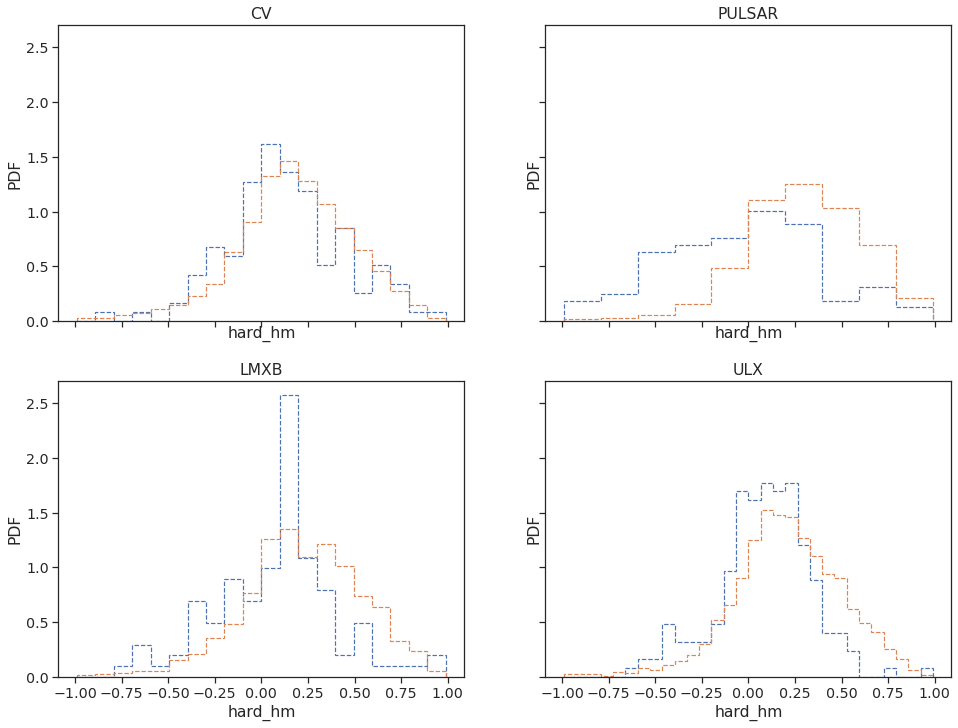

In [354]:
fig , ax = plt.subplots(nrows=2 , ncols=2 , figsize=(16,12) , sharex=True , sharey=True)
plot('CV' , 'hard_hm' , ax[0][0] , bins=20)
plot('PULSAR' , 'hard_hm' , ax[0][1] , bins=10)
plot('LMXB' , 'hard_hm' , ax[1][0] , bins=20)
plot('ULX' , 'hard_hm' , ax[1][1])
#plot('LMXB' , 'hard_hm' , ax[2][0])
#plot('CV' , 'hard_hm' , ax[2][1])
plt.savefig('notes/images/hard_hm_minority.png')
plt.show()


In [ ]:
fig , ax = plt.subplots(nrows=2 , ncols=3 , figsize=(20,12))
plot('AGN' , 'hard_hm' , ax[0])
plot('STAR' , 'hard_hm' , ax[1])
plot('YSO' , 'hard_hm' , ax[2])
plt.savefig('notes/images/hard_hm_majority.eps')
plt.show()


### KL-Divergence

In [144]:
def kl_divergence(p, q):
    #print(len(p) , len(q))
    s = []
    for i in range(len(p)):
        pi , qi = p[i] , q[i]
        #print(qi)
        if(qi!=0 and pi!=0):
            s.append(pi*np.log(pi/qi))
    return np.sum(s)

In [232]:
z = []
from tqdm import tqdm

#for i in tqdm(range(500)):
def calc_KL(cla , clb , feat):
    dist_a = df_train[df_train['class']==cla][feat] 
    dist_b = df_new[df_new['class']==clb][feat]
    # if(len(dist_a) > len(dist_b)):
    #     dist_a = dist_a.sample(len(dist_b))
    # else:
    #     dist_b = dist_b.sample(len(dist_a))
    #ks(dist_a,dist_b)
    #z.append(z_stat(dist_a , dist_b))
    n_bins = np.min([len(dist_a)/3 , 50])
    rmin = np.min([np.min(dist_a) , np.min(dist_b)])
    rmax = np.max([np.max(dist_a) , np.max(dist_b)])
    pdfa = np.histogram(dist_a , range = (rmin , rmax) , bins=50 , density=True)[0]
    pdfb = np.histogram(dist_b , range = (rmin , rmax) , bins=50 , density=True)[0]
    #pdfa = np.histogram(dist_a , range = (-0.99 , 0.99) , bins=50 , density=True)[0]
    #pdfb = np.histogram(dist_b , range = (-0.99 , 0.99) , bins=50 , density=True)[0]
    return kl_divergence(pdfa , pdfb)

In [236]:
calc_KL('AGN' , 'AGN' , 'hard_hm')

3.073321890341726

In [311]:
#labels = ['HMXB' , 'LMXB' ,'ULX' ,'CV' ,'PULSAR']
labels = ['AGN', 'STAR' , 'YSO' ,]
kl_mat = []
for l1 in tqdm(labels):
    kl_row = []
    for l2 in labels:
    #    kl_val = []
    #    for i in range(30):
    #kl_val.append()
        kl_row.append(calc_KL(l1 , l2 , 'hard_hm'))
    kl_mat.append(kl_row)
kl_mat = np.asarray(kl_mat)
kl_mat = pd.DataFrame(kl_mat , index = labels , columns = labels)
kl_mat

100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


,AGN,STAR,YSO
AGN,3.073322,8.121231,12.143388
STAR,16.048623,7.962270,15.329784
YSO,2.527192,2.131793,2.187838


In [312]:
print(kl_mat.to_markdown())

|      |      AGN |    STAR |      YSO |
|:-----|---------:|--------:|---------:|
| AGN  |  3.07332 | 8.12123 | 12.1434  |
| STAR | 16.0486  | 7.96227 | 15.3298  |
| YSO  |  2.52719 | 2.13179 |  2.18784 |


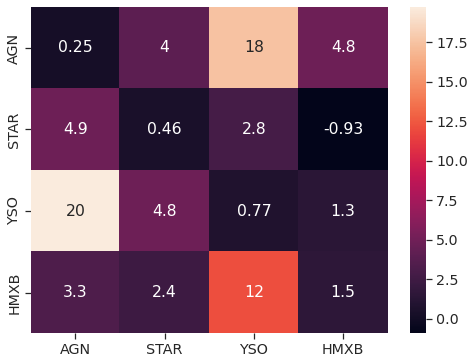

In [248]:
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(8,6))
sns.heatmap(kl_mat , annot=True , ax=ax ,  xticklabels = labels , yticklabels=labels)
plt.show()

In [164]:

def KLdivergence(x, y):
  """Compute the Kullback-Leibler divergence between two multivariate samples.
  Parameters
  ----------
  x : 2D array (n,d)
    Samples from distribution P, which typically represents the true
    distribution.
  y : 2D array (m,d)
    Samples from distribution Q, which typically represents the approximate
    distribution.
  Returns
  -------
  out : float
    The estimated Kullback-Leibler divergence D(P||Q).
  References
  ----------
  Pérez-Cruz, F. Kullback-Leibler divergence estimation of
continuous distributions IEEE International Symposium on Information
Theory, 2008.
  """
  from scipy.spatial import cKDTree as KDTree

  # Check the dimensions are consistent
  x = np.atleast_2d(x)
  y = np.atleast_2d(y)

  n,d = x.shape
  m,dy = y.shape

  assert(d == dy)


  # Build a KD tree representation of the samples and find the nearest neighbour
  # of each point in x.
  xtree = KDTree(x)
  ytree = KDTree(y)

  # Get the first two nearest neighbours for x, since the closest one is the
  # sample itself.
  r = xtree.query(x, k=2, eps=.01, p=2)[0][:,1]
  s = ytree.query(x, k=1, eps=.01, p=2)[0]

  # There is a mistake in the paper. In Eq. 14, the right side misses a negative sign
  # on the first term of the right hand side.
  return np.where(s!=0 ,  -np.log(r/s).sum() * d / n + np.log(m / (n - 1.)) , 0)

In [94]:
KLdivergence(dist_a , dist_b)

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


ZeroDivisionError: float division by zero

20000 20000


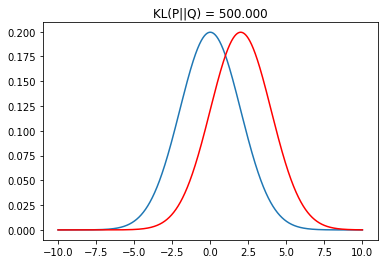

In [38]:
from scipy.stats import norm
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

In [40]:
len(p)

20000

In [35]:
kl_divergence(dist_a , dist_b)

2395 2395


nan

### RF MDS clustering

#### Check Clustering

In [262]:
from utilities import plot_feat_feat
def plot_feat(params):
    classes = params['classes'] 
    prob_th = params['prob_th']  
    xq = params['x']
    yq1 = params['y1']
    yq2 = params['y2']
    xlabel = params['xlabel']
    ylabel1 = params['ylabel1']
    ylabel2 = params['ylabel2']
    fname = params['fname']
    #xq  , yq1 , yq2 =  'gmag' , 'bp-H' ,  'rp-K'
    sns.set(font_scale=1.2, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")
    fig , ax =  plt.subplots(nrows=2 , ncols=2 , figsize=(16,10) , sharex=True, sharey='row')
    plot_feat_feat(df_train, xq,yq1 , ax=ax[0][0] , cl = classes)
    plot_feat_feat(df_new[df_new['prob']>prob_th], xq,yq1 ,  ax=ax[0][1] , cl = classes)
    plot_feat_feat(df_train, xq,yq2 , ax=ax[1][0] , cl = classes)
    plot_feat_feat(df_new[df_new['prob']>prob_th], xq,yq2 , ax=ax[1][1] , cl = classes)
    ax[0][0].legend(loc='upper left')
    ax[1][0].set_xlabel(xlabel)
    ax[1][1].set_xlabel(xlabel)
    ax[0][0].set_ylabel(ylabel1)
    ax[1][0].set_ylabel(ylabel2)
    ax[0][0].set_title("Sources in the training set")
    ax[0][1].set_title("New sources identified in this work")
    plt.subplots_adjust(wspace=0., hspace=0)
    if(fname):
        plt.savefig(fname)
    plt.show()

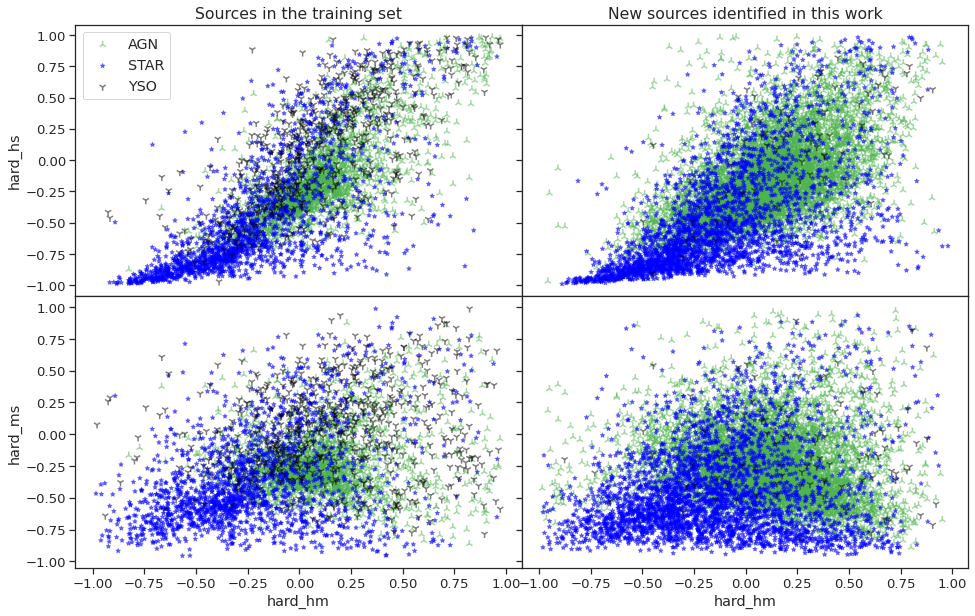

In [269]:
params = {
    'prob_th' : 0.9999 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : 'hard_hm' , 
    'ylabel1' : 'hard_hs' , 
    'ylabel2' : 'hard_ms' , 
    'fname' : f'' , 
    'fname' : "notes/images/hard_majority.png" , 
    'classes' : ['AGN',  'STAR', 'YSO'] ,
}
plot_feat(params)

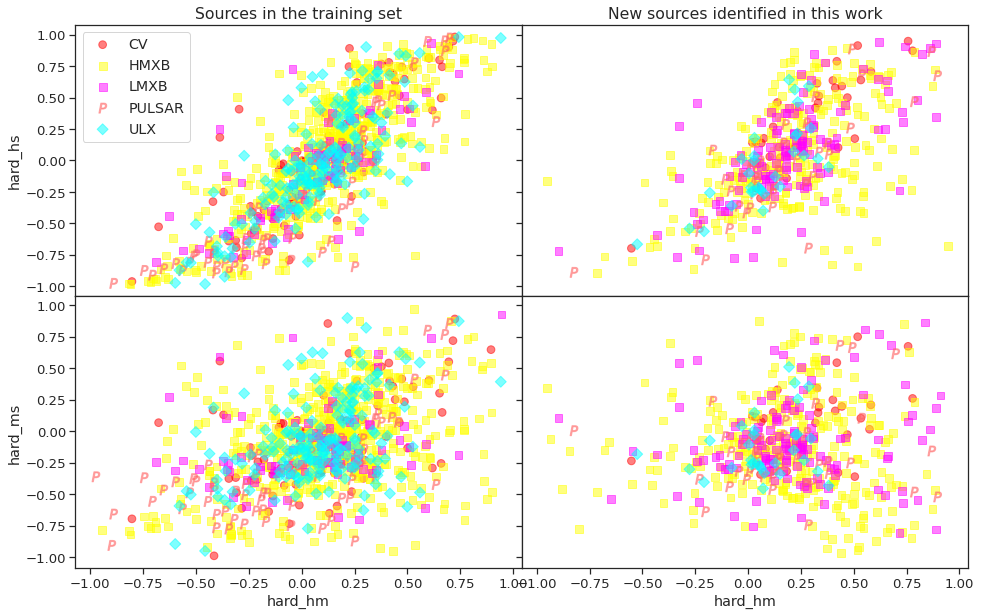

In [268]:
params = {
    'prob_th' : 0.997 , 
    'x' : 'hard_hm' ,
    'y1' : 'hard_hs' , 
    'y2' : 'hard_ms'  ,
    'xlabel' : 'hard_hm' , 
    'ylabel1' : 'hard_hs' , 
    'ylabel2' : 'hard_ms' , 
    'fname' : f'' , 
    'fname' : "notes/images/hard_minority.png" , 
    'classes' : ['CV' , 'HMXB' , 'LMXB' , 'PULSAR' , 'ULX'] ,
}
plot_feat(params)

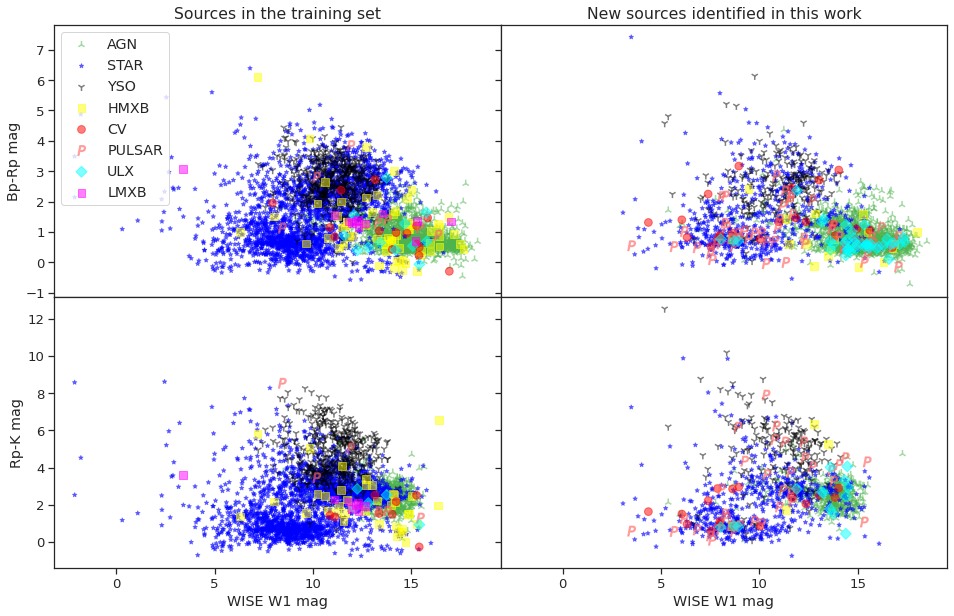

In [283]:
params = {
    'prob_th' : 0. , 
    'x' : 'W1mag' ,
    'y1' : 'bp-R' , 
    'y2' : 'rp-K'  ,
    'xlabel' : 'WISE W1 mag' , 
    'ylabel1' : 'Bp-Rp mag' , 
    'ylabel2' : 'Rp-K mag' , 
    'fname' : f'' , 
    'fname' : "notes/images/color_all.png" , 
    'classes' : ['AGN',  'STAR', 'YSO' ,'HMXB' ,  'CV' , 'PULSAR' , 'ULX' , 'LMXB'] ,
}
plot_feat(params)

In [249]:
from utilities import make_model 
import joblib 
model = joblib.load('models/lightGBM-final.pkl')


In [254]:
feat_imp = pd.DataFrame({
    'name' : model.clf.feature_name_ , 
    'imp' : model.clf.feature_importances_
}).sort_values(by='imp' , ascending=False).reset_index(drop=True)
feat_imp

,name,imp
0,gal_b2,3180
1,gal_l2,2910
2,h-csc,1622
3,0p3_8_csc,1506
4,m-csc,1405
5,var_intra_prob_b,1290
6,u-csc,1259
7,s-csc,1197
8,kp_intra_prob_b,1099
9,var_inter_sigma_b,1029


In [250]:
model.clf.feature_importances_

array([3180, 2910,  760, 1029, 1290,   82, 1099,   51, 1622,  845, 1405,
       1197, 1259, 1506,   86,  144,   95,  145,   64,   49,   54,  154,
         49,  107,  227,  565,  293,  249,  393,  491,  307,  370,  621,
        172,   74,   98,   69,  144,  359,  153,  233], dtype=int32)

In [251]:
model.clf.feature_name_

['gal_b2',
 'gal_l2',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'var_intra_prob_b',
 'var_inter_index_b',
 'kp_intra_prob_b',
 'var_intra_index_b',
 'h-csc',
 'b-csc',
 'm-csc',
 's-csc',
 'u-csc',
 '0p3_8_csc',
 'FUV',
 'NUV',
 'u-sdss',
 'g-sdss',
 'r-sdss',
 'i-sdss',
 'z-sdss',
 'W1',
 'W2',
 'W3',
 'W4',
 '24_microns_(MIPS)',
 'J',
 'H',
 'K',
 'G',
 'Bp',
 'Rp',
 'B-R',
 'G-J',
 'G-W2',
 'Bp-H',
 'Bp-W3',
 'Rp-K',
 'J-H',
 'J-W1',
 'W1-W2']

#### Using random forest

In [83]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [105]:
random_forest_imputer = RandomForestImputer(data=df_new[['class' , 'hard_hm' , 'hard_ms']].sample(1000) ,
                                            target_variable_name="class",
                                            training_resilience=3, 
                                            n_iterations_for_convergence=2)

In [106]:
random_forest_imputer.set_ensemble_model_parameters(n_estimators=100, additional_estimators=10)

In [107]:
new_data = random_forest_imputer.train(sample_size=0, 
                                       path_to_save_dataset="Loan_approval_no_nan.csv")

[DATA SAMPLING]: 100% |#########################################| Time: 0:00:00
[ISOLATING SAMPLESWITH NO TARGET VALUE]: 100% |#################| Time: 0:00:00


[PREDICTING FEATURE TYPE]: 100% |###############################| Time: 0:00:00


[PREDICTING TARGET VARIABLETYPE]: 100% |########################| Time: 0:00:00
[RETRIEVING NAN COORDINATES]: 100% |############################| Time: 0:00:00
[MAKING INITIAL GUESSES]: 100% |################################| Time: 0:00:00
[1/1-BUILDING RANDOM FOREST]: 100% |############################| Time: 0:00:00
[1-FITTING AND EVALUATING MODEL]: 100% |########################| Time: 0:00:00
[1-BUILDING PROXIMITY MATRIX TREES/OOB 110/0.41]: 100% |########| Time: 0:00:11


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [111]:
dm = random_forest_imputer.get_distance_matrix()
mds = random_forest_imputer.get_mds_coordinates(n_dimensions = 2 , distance_matrix = dm)

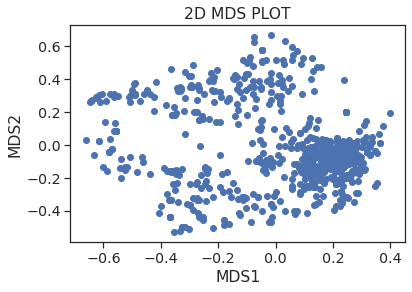

In [112]:
random_forest_imputer.show_mds_plot(mds , )